# <center>Taller 3<br>Introducción a Machine Learning para economistas<br>Luis Ángel Mazabuel García<br><br>07/07/2020</center>

### 1) Para el mismo ejercicio expuesto anteriormente (<u>make_circles</u>), realice la clasificación de los datos <u>make_moons</u>.

Carga y graficación de los datos:

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets import make_circles, make_moons
import time
from IPython.display import clear_output

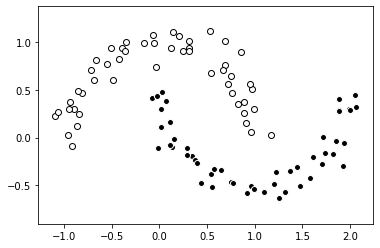

In [15]:
p = 2

X, Y = make_moons(noise=0.1, random_state=0)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:,0] ==0,0],X[Y[:,0] == 0,1], c="white", edgecolors="black")
plt.scatter(X[Y[:,0] ==1,0],X[Y[:,0] == 1,1], c="black", edgecolors="white")
plt.axis('equal')
plt.show()

Iniciar el aprendizaje de las neuronas bajo la <b>Función de activación Sigmoidal</b>:

In [3]:
# Creación de capas
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)* 2 -1
    self.W = np.random.rand(n_conn, n_neur)* 2 -1

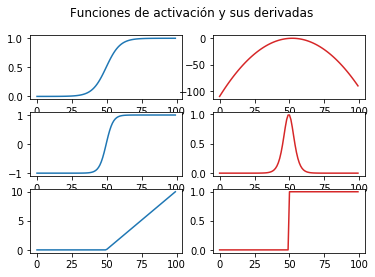

In [4]:
# Funciones de activación

# Sigmoide
sigm = (lambda x: 1 / (1 +np.e ** (-x)),
        lambda x: x*(1 -x))

# def sigm(x, deriv = False):
#     s = 1 / (1 +np.e ** (-x))
#     if(deriv==True):
#         return x*(1 -x)
#     return s

# Tangente Hiperbólica
tanh = (lambda x: np.tanh(x),
        lambda x: 1.0 - np.tanh(x)**2)
        
# def tanh(x, deriv = False):
#     t = (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))
#     if(deriv==True):
#         return 1-t**2
#     return t

# ReLu
relu = (lambda x: np.maximum(0, x),
        lambda x: 1. * (x > 0))

# def relu(x, deriv = False):
#     r = np.maximum(0, x)
#     if(deriv==True):
#         for a in x:
#             if a<0:
#                 return 0
#             else:
#                 return 1
#     return r

# Leaky-ReLu
lerelu = (lambda x: np.maximum(0.1 * x,x),
          lambda x: 0.1 if x<0 else x)
          
        
# def lerelu(x, alpha=0.01):
#     dx = np.ones_like(x)
#     dx[x < 0] = alpha
#     return dx

# SoftMax
sofm = lambda x: np.exp(X) / np.sum(np.exp(X), axis = 1)

# def softmax(X):
#     expo = np.exp(X)
#     expo_sum = np.sum(np.exp(X))
#     return expo/expo_sum
 
# Crear la Red Neuronal

def create_nn(topology, act_f):  
  nn = []
  for l, layer in enumerate(topology[:-1]):
      nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn

d = np.linspace(-10,10, 100)

fig, axs = plt.subplots(3,2)
fig.suptitle('Funciones de activación y sus derivadas')
axs[0, 0].plot(sigm[0](d),'tab:blue')
axs[0, 1].plot(sigm[1](d),'tab:red')
axs[1, 0].plot(tanh[0](d),'tab:blue')
axs[1, 1].plot(tanh[1](d),'tab:red')
axs[2, 0].plot(relu[0](d),'tab:blue')
axs[2, 1].plot(relu[1](d),'tab:red')

In [5]:
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5, train = True):
  
  out = [(None, X)]
  
  # forwar pass
  for l, layer in enumerate(neural_net):
  
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    
    out.append((z, a))
    
  
  if train:
    
    # Backward pass
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]
      
    
          
      if l == len(neural_net) - 1:
        # Calcular delta última capa.
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      
      else:
        # Calcular delta respecto a capa previa.
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
    
      _W = neural_net[l].W
      
    
      # Gradiant descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis =0, keepdims = True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
      
  return out[-1][1]

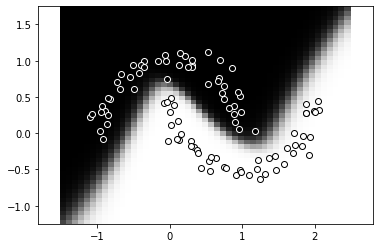

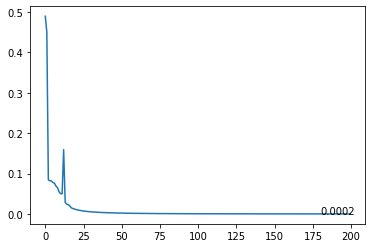

In [16]:
topology = [p, 80, 80, 1]

neural_n = create_nn(topology, sigm)

sloss = []

for i in range(5000):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
  
    sloss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 2.5, res)
    _x1 = np.linspace(-1.25, 1.75, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i1, i0] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap=cm.gray)
    plt.axis("equal")
    
    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="black", edgecolors="white")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="white", edgecolors="black")
    clear_output(wait=True)
    
    plt.show()
    plt.plot(range(len(sloss)), sloss)
    plt.annotate('%0.4f' % sloss[-1], xy=(1, sloss[-1]), xytext=(len(sloss)*0.9, sloss[-1]*1.3))
    plt.show()
    time.sleep(0.001)

### 2) Realice otra función de activación diferente a la expuesta en este código.

Para que la futura comparación de la eficiencia de cada red neuronal se utilizarán los mismos hiperparámetros Learning-Rate, Número de Capas y Número de Neuronas en cada capa. De lo contrario no sería coherente comparar cada modelo.

### <center>Tangente Hiperbólica</center>

In [7]:
topology = [p, 80, 80, 1]

neural_n = create_nn(topology, tanh)
tloss = []
for i in range(5000):
    # Entrenemos a la red!
    pY = train(neural_n, X, Y, l2_cost, lr=0.05)
    if i % 25 == 0:
        
        tloss.append(l2_cost[0](pY, Y))
        res = 50
        _x0 = np.linspace(-2, 3, res)
        _x1 = np.linspace(-1.5, 2, res)
        _Y = np.zeros((res, res))
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i1, i0] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

### <center>ReLu</center>

In [8]:
topology = [p, 80, 80, 1]

neural_n = create_nn(topology, relu)
rloss = []
for i in range(5000):
    # Entrenemos a la red!
    pY = train(neural_n, X, Y, l2_cost, lr=0.05)
    if i % 25 == 0:
        
        rloss.append(l2_cost[0](pY, Y))
        res = 50
        _x0 = np.linspace(-2, 3, res)
        _x1 = np.linspace(-1.5, 2, res)
        _Y = np.zeros((res, res))
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i1, i0] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

### 3) Muestre visualmente que tan bien esta clasificando el modelo, compare los resultados con una función sigmoide.
### <center>Tangente Hiperbólica</center>

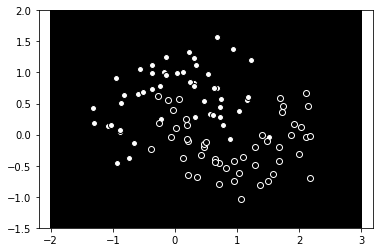

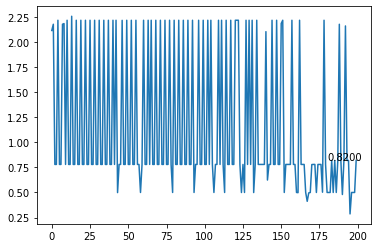

In [9]:
plt.pcolormesh(_x0, _x1, _Y, cmap=cm.gray)
plt.axis("equal")

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="white", edgecolors="black")
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="black", edgecolors="white")
plt.show()
plt.plot(range(len(tloss)), tloss)
plt.annotate('%0.4f' % tloss[-1], xy=(1, tloss[-1]), xytext=(len(tloss)*0.9, tloss[-1]))
plt.show()

### <center>ReLu</center>

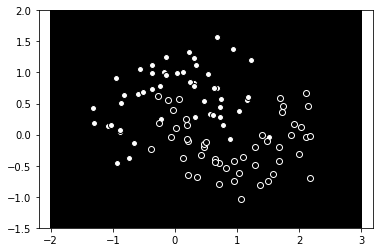

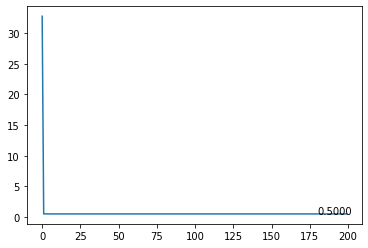

In [10]:
plt.pcolormesh(_x0, _x1, _Y, cmap=cm.gray)
plt.axis("equal")

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="white", edgecolors="black")
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="black", edgecolors="white")
plt.show()
plt.plot(range(len(rloss)), rloss)
plt.annotate('%0.4f' % rloss[-1], xy=(1, rloss[-1]), xytext=(len(rloss)*0.9, rloss[-1]))
plt.show()

### 4) De acuerdo a lo visto en las sesiones y en el vídeo enviado la sesión pasada, interprete los resultados obtenidos.

Para elegir adecuadamente los hiperparámetros de la red neuronal (Número de capas, Número de neuronas en cada capa, Tasa de Aprendizaje) pueden emplearse funciones de optimización disponibles gracias a la comunidad de Python, sin embargo, estas funciones de optimización se basan en la creación de bucles complejos que miden menor respuesta de error o pérdida en el modelo (loss) según una combinación grande de estos hiperparámetros. En la práctica, para personajes recientemente iniciados en estos modelos, este método de prueba y error resulta altamente útil. Sin embargo, con la experiencia se obtiene el conocimiento de algunos factores que pueden afectar el rendimiento del modelo según cierta designación de estos hiperparámetros. Por ejemplo, entre mayor sea el tamaño de la muestra mejor rendimiento tendrá el hecho de incluir más capas en la red neuronal. Así mismo sucede con el número de neuronas en cada una de esas capas. Si se incluye un gran número de capas y de neuronas en cada una de esas capas con un tamaño pequeño de muestra para entrenamiento, el modelo quedará sobresaturado y a la función de activación correspondiente en cada neurona le será asignada menos información de manera que sus resultados van ser inútiles y por tanto la red neuronal no podrá aprender correctamente con esa combinación topológica.

### Sobre los hiperparámetros (Número de capas, Número de neuronas en cada capa y Tasa de Aprendizaje)

En este caso se realizó dicha prueba y error notando que añadir 1 capa oculta da un resultado lineal (no resuelve el problema de clasificación), pues como se explica en la teoría, a pesar de incluir muchas neuronas en una misma capa, al momento de realizar la suma ponderada de estas neuronas se conduce a un modelo que se acerca cada vez más a un modelo lineal. Por otro lado, al añadir una 3° capa oculta también disminuye considerablemente el rendimiento del modelo en términos de mínima pérdida/error (loss). Por lo que se llegó a la conclusión de que al tener una muestra de 100 (como en este caso) lo mejor es manejar solamente 2 capas.

Para determinar el Número de Neuronas en cada capa se hizo ensayo y error en combinaciones capa 1 = capa 2, capa 1 > capa 2 y capa 2 > capa 1 notando que la mejor combinación era cuando la capa 1 tenía igual número de neuronas que la capa 2. Se realizaron pruebas pasando por los números de neuronas 2, 4, 6, 8, 10, 15, 20, 30, 40, 60, 80, 100, 120, 140, 200. A su vez se realizaron estas pruebas considerando las tasas de aprendizaje de la red neuronal (Learning-Rate) 0.005, 0.01, 0.05, 0.075, 0.1 Y tras un gran tiempo de entrenamiento con cada una de estas combinaciones se observó que el número de neuronas y la tasa de aprendizaje que optimizan el modelo son 1° capa oculta = 80, 2° capa oculta = 80 y Tasa de Aprendizaje = 0.05. En el proceso se observó que aumentar la tasa de aprendizaje a 0.075 y 0.1 puede resultar útil para que la velocidad de aprendizaje del modelo aumente (pendiente negativa pronunciada de loss), pero que no se aprovecha la cantidad de iteraciones por lo que seguramente se estaría cayendo en un problema de overfitting. Por este último motivo se prefirió elegir la combinación que bajo 5000 iteraciones conservara un aprendizaje de velocidad media donde, finalmente, se consiguen resultados igualmente óptimos.

### Sobre la función de activación de la red neuronal

Si bien existe la posibilidad de introducir distintos tipos de funciones de activación para cada una de las capas de la red neuronal, en el actual ejercicio el énfasis se marcó en revisar la eficacia de una red neuronal con todas sus capas bajo una misma función de activación para así poder comparar el comportamiento de cada red neuronal bajo el tipo de clasificación que se requería en este caso.

Cuando se maneja un problema de clasificación de respuesta binaria: los resultados pueden ser o bien 1, o bien 0, y esto se puede traducir posteriormente a categorías como "perro o gato", "sí o no", "probable o improbable" o "blanco o negro" (como era en nuestro caso), etc., resulta evidente que toca emplear un modelo que en su capa de salida, por lo menos, se acomode a este tipo de resultados. De esta manera, la función de activación que mejor se adapta es la función Sigmoidal o Logística.

Al entrenar cada una de las 3 redes neuronales con distintas funciones de activación comprometidas a todas sus capas, se observó que efectivamente la red neuronal con funciones de activación Sigmoidales logró clasificar eficazmente los datos. Sin embargo, las otras 2 funciones de activación evaluadas no brindaron resultados satisfactorios.

En el caso de la red neuronal con funciones Tangenciales Hiperbólicas, puede explicarse dicha falla en la naturaleza propia de la variable de respuesta Y (blanco o negro), ya que estos valores corresponden a una asignación binaria de 0,1. De esta manera, estas funciones de activación dan como resultado que se estima que todos los valores (y_estimados) sean 1 (negro) pues no hay información de entrenamiento en el cual el modelo observada que el resultado en la variable de respuesta fuera menor a 0.

Por otro lado, con una red neuronal con todas sus funciones de activación ReLU no se esperaría mayor resultado que el obtenido. Pues estas funciones son en su mayoría empleadas para mejorar la eficiencia en la computación del entrenamiento del modelo, ya que esta función permite que la red neuronal converja más rapidamente hacia la menor pérdida/error (loss). Sin embargo emplearla como función de activación en la capa de salida (output_layer) de la red neuronal no tiene mayor utilidad. Tanto así que, por ejemplo, para este caso podría haber sido interesante evaluar cómo se comportaba la red neuronal con funciones ReLU en las capas ocultas y la función sigmoidal en la capa de salida. Sin embargo, aún no manejo el nivel para desarrollar o entender ese código.